In [ ]:
!pip install statsmodels

In [ ]:
import pandas as pd

# Assuming your data is stored in a CSV file
data = pd.read_csv('/content/Rice_AP_TL_Final.csv', header=None)
values_AP_TL = data.iloc[1].values
values_TL = data.iloc[2].values

In [ ]:
print(type(values_AP_TL))

<class 'numpy.ndarray'>


In [ ]:
values_AP_TL = [float(value_AP_TL) for value_AP_TL in values_AP_TL]
values_AP_TL = list(map(float, values_AP_TL))

In [ ]:
values_TL = [float(value_TL) for value_TL in values_TL]
values_TL = list(map(float, values_TL))

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.3 MB/s eta 0:00:00


#AUTO ARIMA MODEL


In [ ]:
import pandas as pd
from pmdarima import auto_arima

# Lakukan fitting model ARIMA
model = auto_arima(values_TL, start_p=1, start_q=1,
                    max_p=3, max_q=3, m=12,
                    start_P=0, seasonal=True,
                    d=1, D=1, trace=True,
                    error_action='ignore',
                    suppress_warnings=True,
                    stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.53 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=108.916, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=inf, Time=0.36 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=110.876, Time=0.20 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.44 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=107.989, Time=0.08 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.21 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=107.574, Time=0.39 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.68 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=109.555, Time=0.69 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=inf, Time=0.45 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=inf, Time=0.39 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=inf, Time=0.68 sec
 ARIMA(

In [ ]:
# Forecast future values
forecast = model.predict(n_periods=5)  # Forecast for the next 5 years
print("Forecasted values for the next 5 years for TL:", forecast)

Forecasted values for the next 5 years for TL: [17450.3596616  19452.55717373 22266.82028497 24032.38713514
 25960.65325593]


In [ ]:
import pandas as pd
from pmdarima import auto_arima

# Lakukan fitting model ARIMA
model = auto_arima(values_AP_TL, start_p=1, start_q=1,
                    max_p=3, max_q=3, m=12,
                    start_P=0, seasonal=True,
                    d=1, D=1, trace=True,
                    error_action='ignore',
                    suppress_warnings=True,
                    stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.32 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=112.516, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=inf, Time=0.77 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.52 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=112.464, Time=0.11 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=114.464, Time=0.24 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=114.403, Time=0.23 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=116.403, Time=0.34 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=112.459, Time=0.79 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=114.177, Time=0.13 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=inf, Time=0.71 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=114.459, Time=0.37 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=0.52 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=108.325, Time=

In [ ]:
# Forecast future values
forecast_AP_TL = model.predict(n_periods=5)  # Forecast for the next 5 years
print("Forecasted values for the next 5 years for TL:", forecast_AP_TL)

Forecasted values for the next 5 years for TL: [26758.08465763 29065.33161185 32099.08736464 34596.93665961
 37493.88447072]


In [ ]:
forecast_AP = forecast_AP_TL - forecast
print("Forecasted values for the next 5 years for AP:", forecast_AP)

Forecasted values for the next 5 years for AP: [ 9307.72499602  9612.77443812  9832.26707967 10564.54952446
 11533.23121479]


In [ ]:
df = pd.DataFrame({'Telangana': forecast, 'Andhra Pradesh + Telangana': forecast_AP_TL, 'Andhra Pradesh': forecast_AP})
df.to_csv('AP_TL_forecast.csv', index=False)
from google.colab import files

# Download the CSV file
files.download('AP_TL_forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#PLOTS FOR FORCASTED AND ACTUAL VALUES

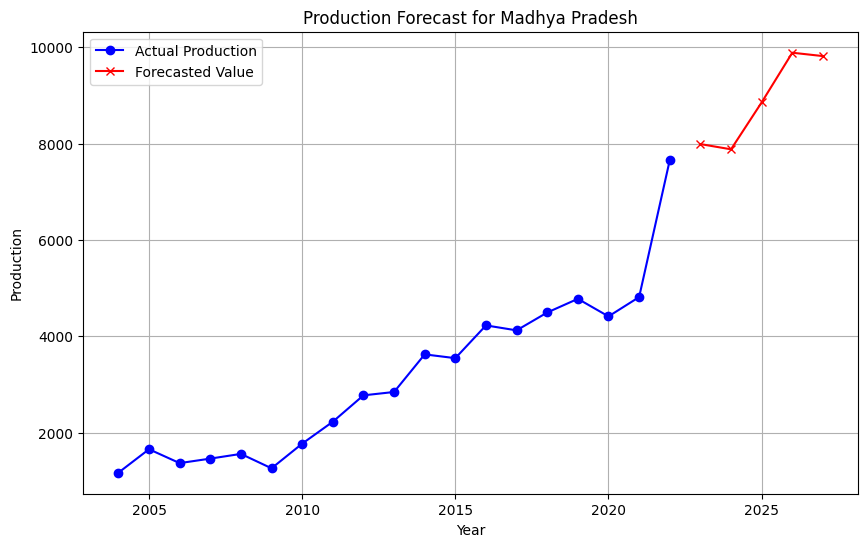

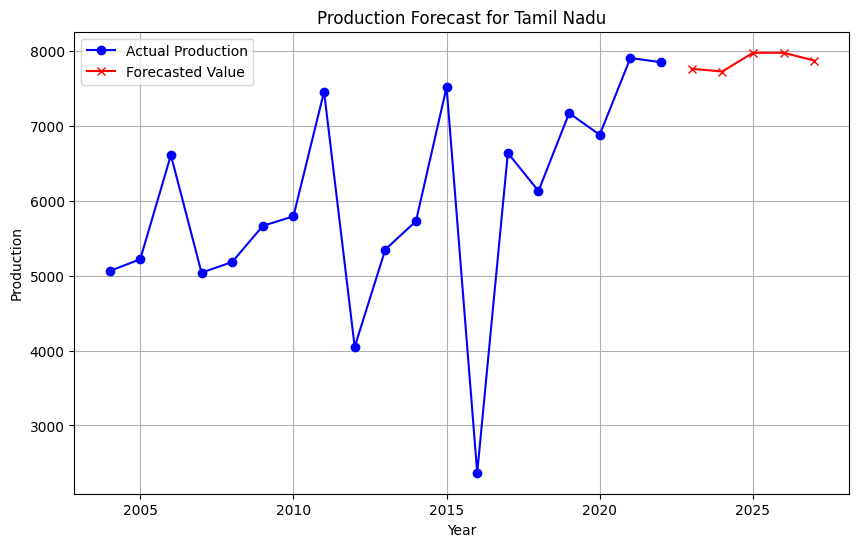

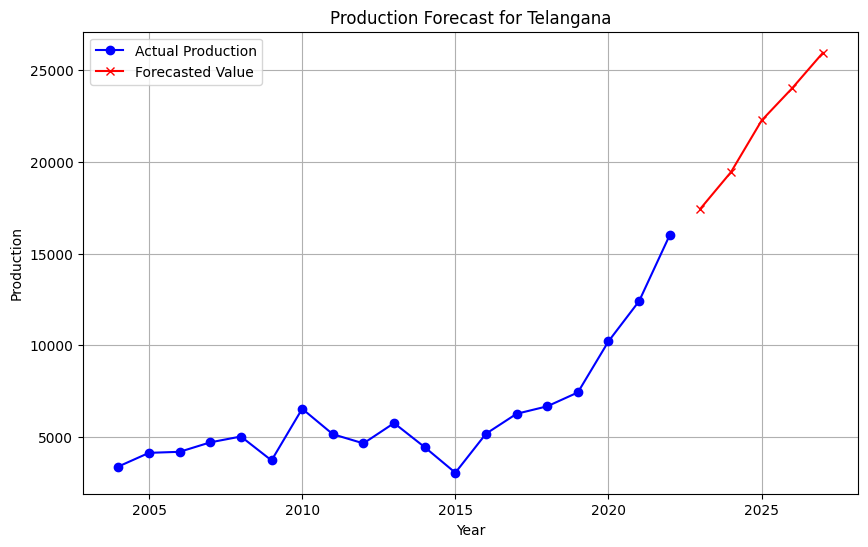

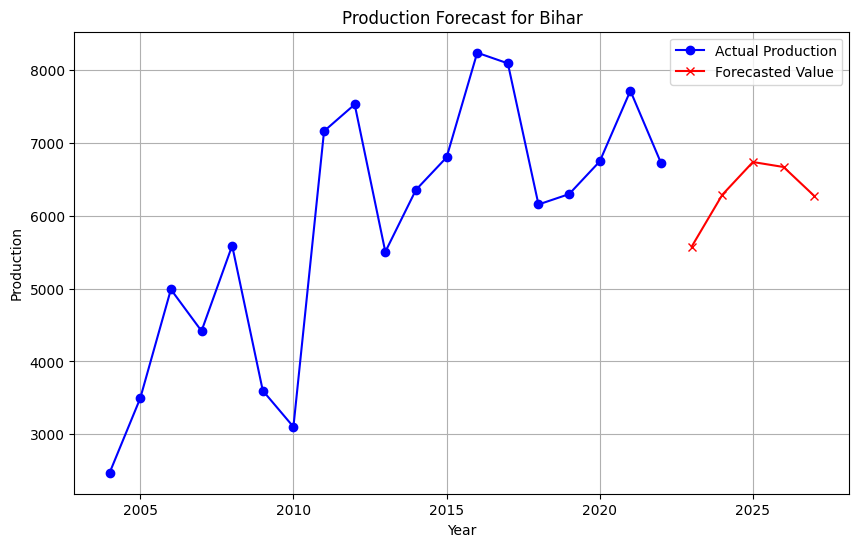

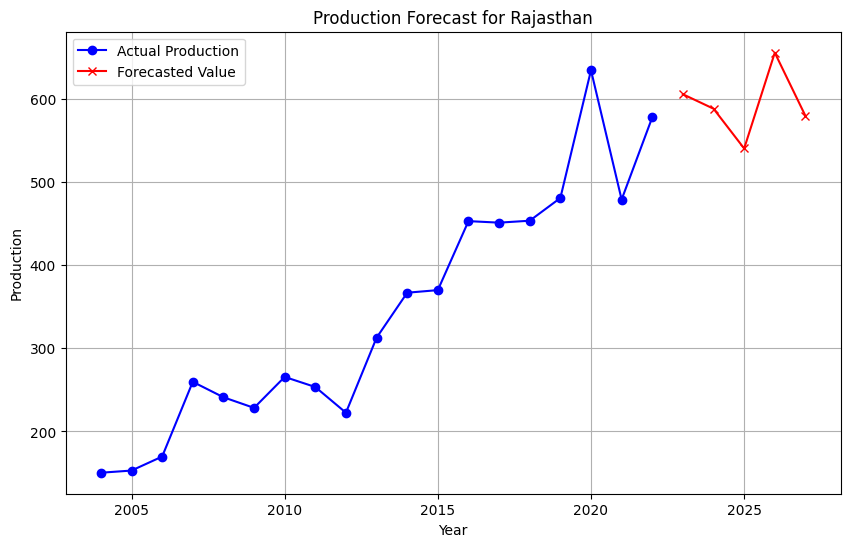

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load actual production data
actual_data = pd.read_csv('/content/processed_ds1.csv')

# Load forecasted data
forecast_data = pd.read_csv('/content/forecast_final.csv')

# Set the first column as the index (assuming it contains years)
actual_data.set_index(actual_data.columns[0], inplace=True)
forecast_data.set_index(forecast_data.columns[0], inplace=True)

states_to_plot = ['Madhya Pradesh', 'Tamil Nadu', 'Telangana', 'Bihar', 'Rajasthan']  # Add the names of the states you want to plot

# Plot the data for the specified states
for state in states_to_plot:
    plt.figure(figsize=(10, 6))
    plt.plot(actual_data.index, actual_data[state], label='Actual Production', color='blue', marker='o')
    plt.plot(forecast_data.index, forecast_data[state], label='Forecasted Value', color='red', marker='x')
    plt.title(f'Production Forecast for {state}')
    plt.xlabel('Year')
    plt.ylabel('Production')
    plt.legend()
    plt.grid(True)
    plt.show()